## gmm

## 라이브러리 import

In [23]:

#import sys
#from tqdm.notebook import tqdm

import pandas as pd  #데이터 분석 라이브러리
import numpy as np # 계산 라이브러리
from sklearn.mixture import GaussianMixture #gmm 라이브러리
from sklearn.decomposition import PCA #주성분 분석 라이브러리

import matplotlib as mpl # 그래프 라이브러리
import plotly.express as px #그래프 라이브러리
import seaborn as sns #seaborn 그래프 라이브러리

import matplotlib.pyplot as plt #pyplot 그래프 라이브러리
import matplotlib.font_manager as fm  #그래프 폰트 라이브러리
%matplotlib inline

fm._rebuild() #json파일에 업데이트 해주기

plt.rc("font", family="Malgun Gothic") #폰트 맑은 고딕 적용


## 데이터 불러오기

In [24]:
df1 = pd.read_csv('../Data/Preprocessing/활성화지표_추가본.csv',encoding='cp949') #데이터 불러오기

In [25]:
df1.head()

,시도명,자치구,행정동명,행정동코드,행정기관코드,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),재생도시,가구당인구수,노인인구비율,기초생활 대상자 비율,종사자수 증감률
0,서울특별시,서울특별시 종로구,사직동,1101053.0,1111053000,-13.703589,2,0.338696,1,73.636364,1.0,2.07,5.471891,0.014819,-0.040657
1,서울특별시,서울특별시 종로구,삼청동,1101054.0,1111054000,-71.395349,3,-2.691790,1,77.192982,1.0,1.98,4.398734,0.016852,0.005244
2,서울특별시,서울특별시 종로구,부암동,1101055.0,1111055000,-28.333333,5,4.251386,1,75.547703,0.0,2.35,5.606197,0.015518,-0.042948
3,서울특별시,서울특별시 종로구,평창동,1101056.0,1111056000,-4.272303,4,2.092050,0,71.133568,0.0,2.48,5.428951,0.007883,-0.033100
4,서울특별시,서울특별시 종로구,무악동,1101057.0,1111057000,-37.690513,3,-15.185185,4,54.545455,0.0,2.74,6.083636,0.019178,0.028786


In [26]:
df1.columns #데이터 컬럼 확인

Index(['시도명', '자치구', '행정동명', '행정동코드', '행정기관코드', '과거대비인구변화(%)',
       '최근인구변화(연속감소년수)', '과거대비사업체변화(%)', '최근사업체변화(연속감소년수)', '노후건축물비율(%)',
       '재생도시', '가구당인구수', '노인인구비율', '기초생활 대상자 비율', '종사자수 증감률'],
      dtype='object')

In [27]:
hang = df1['행정동코드'] #행정동코드만 따로 분리

In [28]:
df1_use = df1[['과거대비인구변화(%)','최근인구변화(연속감소년수)','과거대비사업체변화(%)','최근사업체변화(연속감소년수)','노후건축물비율(%)', '노인인구비율', '기초생활 대상자 비율']]
# 최종 사용 변수


## aic , bic

In [29]:
#gmm은 elbow 대신 이거 씀
#이게 작을수록 좋다
#https://berrrrr.github.io/datascience/2020/11/16/hands-on-ml-9/
k = range(1,20)
for i in k:
    gmm_model = GaussianMixture(n_components=i, random_state=42)
    gmm_mm = gmm_model.fit_predict(df1_use)
    b = gmm_model.bic(df1_use)
    a = gmm_model.aic(df1_use)
    print(i,'bic :',b,'aic :',a)

1 bic : 12283.306493807237 aic : 12141.648467540617
2 bic : 11963.02749362167 aic : 11675.664068909384
3 bic : 11947.816676603732 aic : 11514.74785344578
4 bic : 11994.476971989086 aic : 11415.70275038547
5 bic : 12081.054120657122 aic : 11356.574500607838
6 bic : 12197.376003718133 aic : 11327.190985223184
7 bic : 12362.978629579644 aic : 11347.088212639028
8 bic : 12505.797571772368 aic : 11344.201756386086
9 bic : 10579.815214624386 aic : 9272.514000792438
10 bic : 10558.079994352984 aic : 9105.07338207537
11 bic : 10715.44464759609 aic : 9116.732636872812
12 bic : 12898.620992203892 aic : 11154.203583034947
13 bic : 10822.326382864518 aic : 8932.203575249905
14 bic : 11005.44144975155 aic : 8969.613243691272
15 bic : 13090.921716816307 aic : 10909.388112310364
16 bic : 13083.431261399488 aic : 10756.192258447878
17 bic : 13166.922789146989 aic : 10693.978387749714
18 bic : 13333.100277454087 aic : 10714.450477611144
19 bic : 13350.995637849142 aic : 10586.640439560535


## gmm

In [30]:
# GMM 적용
gmm = GaussianMixture(n_components=4, random_state=42) # n_components로 미리 군집 개수 설정
gmm_labels = gmm.fit_predict(df1_use)

# GMM 후 클러스터링 레이블을 따로 설정
df1_use['gmm_cluster'] = gmm_labels


<ipython-input-30-3cab13376c72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_use['gmm_cluster'] = gmm_labels


In [31]:
df1_use.head() #데이터 확인

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,gmm_cluster
0,-13.703589,2,0.338696,1,73.636364,5.471891,0.014819,3
1,-71.395349,3,-2.691790,1,77.192982,4.398734,0.016852,0
2,-28.333333,5,4.251386,1,75.547703,5.606197,0.015518,3
3,-4.272303,4,2.092050,0,71.133568,5.428951,0.007883,3
4,-37.690513,3,-15.185185,4,54.545455,6.083636,0.019178,1


In [32]:
df1_use = pd.concat([df1_use,hang],axis=1) #행정동 코드 붙이기

In [33]:
df1_use.head()

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,gmm_cluster,행정동코드
0,-13.703589,2,0.338696,1,73.636364,5.471891,0.014819,3,1101053.0
1,-71.395349,3,-2.691790,1,77.192982,4.398734,0.016852,0,1101054.0
2,-28.333333,5,4.251386,1,75.547703,5.606197,0.015518,3,1101055.0
3,-4.272303,4,2.092050,0,71.133568,5.428951,0.007883,3,1101056.0
4,-37.690513,3,-15.185185,4,54.545455,6.083636,0.019178,1,1101057.0


## 클러스터별 데이터 분리

In [18]:
data_a = df1_use[df1_use['gmm_cluster'] == 0]
data_b = df1_use[df1_use['gmm_cluster'] == 1]
data_c = df1_use[df1_use['gmm_cluster'] == 2]
data_d = df1_use[df1_use['gmm_cluster'] == 3]

## box plot

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


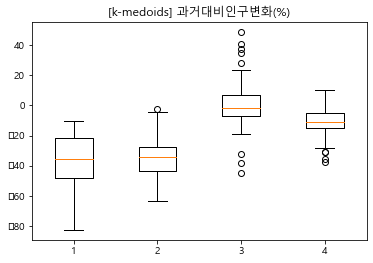

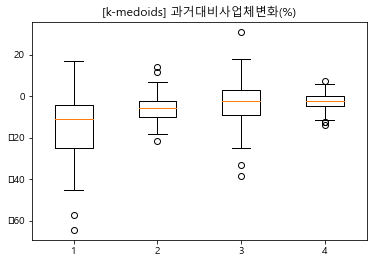

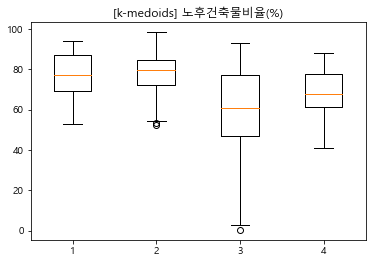

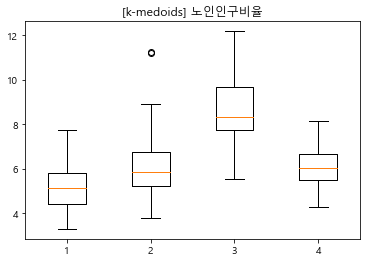

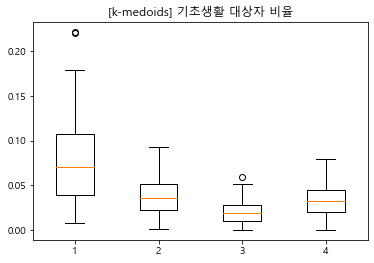

In [34]:
plot_list = ['과거대비인구변화(%)', '과거대비사업체변화(%)',
       '노후건축물비율(%)', '가구당인구수', '노인인구비율', '기초생활 대상자 비율']
count=0
for i in range(0,len(data_a.columns)-1):
    count+=1
    if count==5:
        count=0
    if data_a.iloc[:,i].name not in plot_list:
        continue
    fig, ax = plt.subplots()
    
    ax.boxplot([data_a.iloc[:,i], data_b.iloc[:,i], data_c.iloc[:,i], data_d.iloc[:,i]])

    plt.title('[k-medoids] ' + data_a.iloc[:,i].name)
    
plt.show()

In [39]:
#최근 인구 변화

df1_use.iloc[:,1].groupby([df1_use['gmm_cluster']]).count()
p_a = 42
p_b = 139
p_c = 53
p_d = 198

df1_use.iloc[:,1].groupby([df1_use['gmm_cluster']]).sum() 
s_a = 153
s_b =473
s_c = 132
s_d = 755
print('0:',s_a/p_a)
print('1:',s_b/p_b)
print('2:',s_c/p_c)
print('3:',s_d/p_d)

0: 3.642857142857143
1: 3.402877697841727
2: 2.490566037735849
3: 3.813131313131313


In [42]:
#최근 사업체 변화
df1_use.iloc[:,3].groupby([df1_use['gmm_cluster']]).sum()
s_a = 108
s_b =315
s_c = 87
s_d = 320
print('0:',s_a/p_a)
print('1:',s_b/p_b)
print('2:',s_c/p_c)
print('3:',s_d/p_d)

0: 2.5714285714285716
1: 2.2661870503597124
2: 1.6415094339622642
3: 1.6161616161616161


## PCA

In [52]:
df1_plot = df1_use[['과거대비인구변화(%)', '최근인구변화(연속감소년수)', '과거대비사업체변화(%)',
       '최근사업체변화(연속감소년수)', '노후건축물비율(%)', '노인인구비율', '기초생활 대상자 비율']]
pca = PCA(n_components=2) # 주성분 2개로 결정
printcipalComponents = pca.fit_transform(df1_plot) #주성분 분석 
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2']) #data frame 형태로 변환
df1_plot_final = pd.concat([principalDf,df1_use['gmm_cluster']],axis=1) #주성분 분석 dataframe + cluster 정보 합침
df1_plot_final


,principal component1,principal component2,gmm_cluster
0,-4.773494,-5.433884,3
1,47.445715,18.113711,0
2,8.137963,-0.699953,3
3,-14.389908,-7.689169,3
4,10.054418,23.597620,1
...,...,...,...
418,-12.682075,12.747384,3
419,-8.184541,4.572723,3
420,-6.928106,5.699995,3
421,-8.948829,-8.502749,3


In [53]:
df1_plot_final['gmm_cluster'] = df1_plot_final['gmm_cluster'].apply(lambda x :str(x)) #클러스터 열 데이터 형태 str로 바꾸기

## 산점도

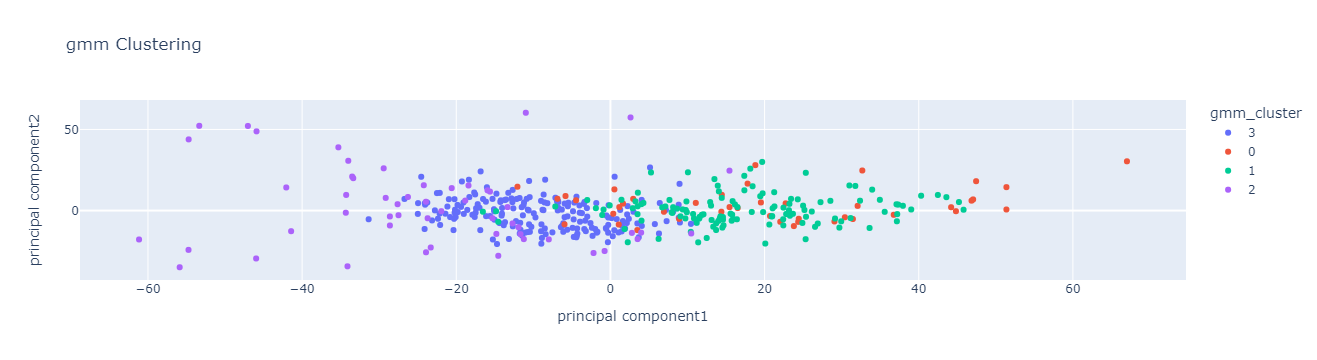

In [54]:
import plotly.express as px
fig = px.scatter(df1_plot_final, x="principal component1", y="principal component2",
                 color="gmm_cluster", # Species 열의 값에 따라서 색깔 표현
                 title='gmm Clustering' # 그래프 타이틀 지정
                )
fig.show()

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



Text(0.5, 1.0, 'GMM')

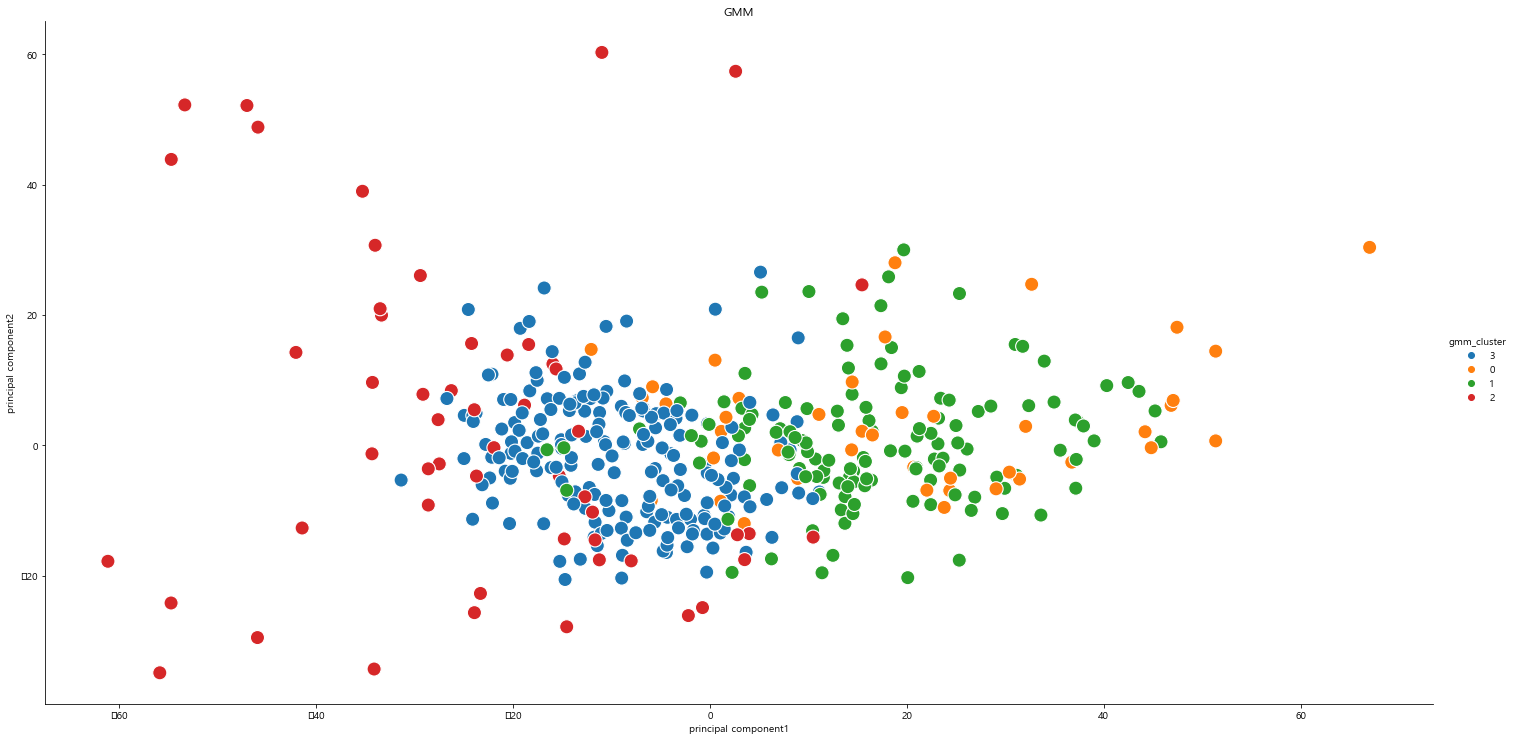

In [55]:
sns.relplot(data=df1_plot_final, x='principal component1', y='principal component2', hue='gmm_cluster', palette='tab10',s=200, kind='scatter',height=10, aspect=2)
plt.title('GMM')

## 타켓 클러스터 (cluster 3)

In [59]:
data_a_target = data_a[['과거대비인구변화(%)','최근인구변화(연속감소년수)','과거대비사업체변화(%)','최근사업체변화(연속감소년수)','노후건축물비율(%)', '노인인구비율', 
                  '기초생활 대상자 비율','행정동코드']] #타겟 클러스터 저장할 정보 저장(cluster 정보 제외)

In [60]:
data_a_target

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,행정동코드
1,-71.395349,3,-2.691790,1,77.192982,4.398734,0.016852,1101054.0
5,-17.639112,2,-45.133992,1,65.089723,6.406580,0.021841,1101058.0
7,-10.256026,4,-3.794240,4,75.576037,4.275792,0.116744,1101061.0
8,-64.354556,3,-6.558862,5,87.413555,5.176142,0.053336,1101063.0
18,-49.221646,2,-16.137566,4,90.170512,4.079104,0.104970,1102054.0
23,-64.764320,2,-12.184664,4,94.223827,4.045455,0.069302,1102060.0
34,-37.757063,5,-7.171776,1,88.413098,5.094315,0.177594,1103053.0
91,-42.260503,5,-20.799408,4,89.893617,6.585801,0.031246,1106089.0
96,-38.042701,4,-25.418060,4,77.196885,6.794037,0.051702,1107055.0
101,-16.016399,3,-9.674185,2,83.068783,5.119463,0.093365,1107062.0


In [61]:
data_a_target.to_csv('../Data/Preprocessing/gmm.csv',encoding='cp949',index=False) #csv로 내보내기